# Promo Data Analysis Exam

**Author:** Mark Cristian Angelo V. Salvador

**Date:** June 29, 2023

In [43]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

In [2]:
#Load Data
transactions = pd.read_csv('promo_order_data.csv')
transactions

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2480,2021-05-31,17,18.0,16.0,18.0,358.60,0.0,NaN,2.0,6.0,0.0,0.0,0.0,0.0,8.0,0.0,18.0
2481,2021-05-31,18,10.0,10.0,10.0,380.60,0.0,NaN,0.0,2.0,0.0,0.0,2.0,0.0,4.0,0.0,10.0
2482,2021-05-31,19,4.0,4.0,4.0,69.00,0.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2483,2021-05-31,20,4.0,4.0,4.0,17.60,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0


- **Trans_date** - Transaction Date
- **Trans_hour** - Transaction Hour
- **Customers** - Number of unique customers active/ordering
- **Vendors** - Number of unique vendors active/ordering
- **Orders** - Number of unique orders through the app
- **Amount** - Total processed order amount in Australian dollars
- **Promo_count** - Number of orders with promos
- **Android** - Number of unique customers who used Android Device
- **GCF** - Number of unique customers who used Google Food Ordering
- **Macintosh** - Number of unique customers who used Mac
- **Tablet** - Number of unique customers who used iPad/iPod
- **Windows** - Number of unique customers who used Windows Device
- **X11** - Number of unique customers who used Linux / CrOS Device
- **iPhone** - Number of unique customers who used iPhone
- **Blacklisted** - Number of unique customers blacklisted (note of course at the time of
  ordering they weren’t blacklisted yet, but eventually, they were)
- **Not Blacklisted** - Number of unique customers who are not blacklisted

In [3]:
#disregard the promo_amount column.
transactions.drop(['promo_amount'], axis = 1, inplace = True)

## Data Cleaning and Pre-processing

In [4]:
# Calculate the number of missing values in each column
missing_values = transactions.isnull().sum()
missing_values

trans_date          0
trans_hour          0
customers           0
vendors             0
orders              0
amount              0
promo_count         0
Android            30
GCF                30
Macintosh          30
Tablet             30
Windows            30
X11                30
iPhone             30
Blacklisted         0
Not Blacklisted     0
dtype: int64

In [5]:
rows_with_missing_values = transactions[transactions.isnull().any(axis=1)]
rows_with_missing_values

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
128,2021-01-09,5,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
191,2021-01-12,23,2.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
242,2021-01-16,2,2.0,2.0,2.0,200.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
407,2021-01-26,5,2.0,2.0,2.0,8.4,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
439,2021-01-27,21,2.0,2.0,2.0,112.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
521,2021-02-02,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
619,2021-02-08,4,2.0,2.0,2.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
636,2021-02-09,4,2.0,2.0,2.0,16.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
720,2021-02-13,21,2.0,2.0,2.0,90.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0
721,2021-02-14,5,2.0,2.0,2.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0


- Since only a small portion of all rows have missing values, it is reasonable to remove them from the dataset

In [6]:
#Drop rows with Missing values
transactions.dropna(inplace=True)

In [7]:
# Check the Data type of each column
transactions.dtypes

trans_date          object
trans_hour           int64
customers          float64
vendors            float64
orders             float64
amount             float64
promo_count        float64
Android            float64
GCF                float64
Macintosh          float64
Tablet             float64
Windows            float64
X11                float64
iPhone             float64
Blacklisted        float64
Not Blacklisted    float64
dtype: object

# Customer Profiling and Segmentation

In [8]:
transactions.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0


### Customer Per Day

In [9]:
# Group transactions by transaction date and calculate the sum of customers for each date
trans_per_day = transactions.groupby('trans_date')[['customers']].sum()
trans_per_day

,customers
trans_date,
2021-01-01,4088.0
2021-01-02,9848.0
2021-01-03,9494.0
2021-01-04,13692.0
2021-01-05,14740.0
...,...
2021-05-27,33218.0
2021-05-28,29324.0
2021-05-29,15406.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


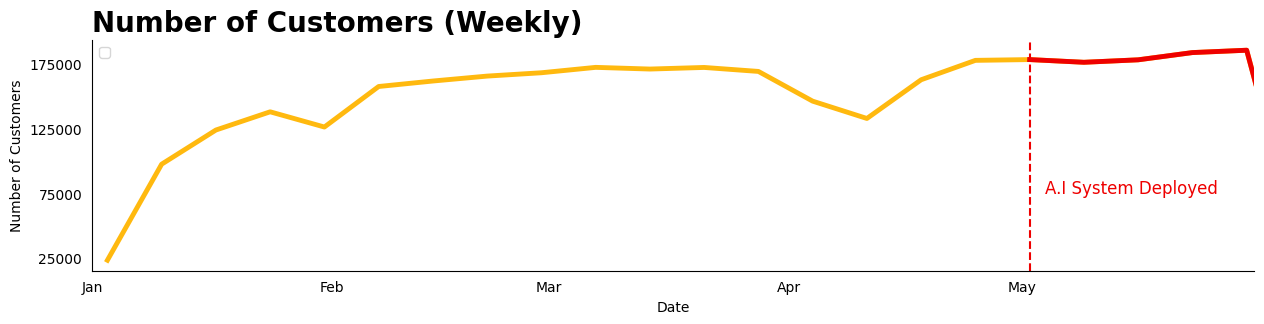

In [13]:
# Convert the index of 'trans_per_day['customers']' to a datetime index
trans_per_day['customers'].index = pd.to_datetime(trans_per_day['customers'].index)

# Resample the data to a weekly frequency
weekly_data = trans_per_day['customers'].resample('W').sum()

# Plotting the resampled data
fig = plt.figure(figsize=(15, 3))

# Plot the weekly data in a specific color and linewidth
plt.plot(weekly_data, color='#FFB90F', linewidth=3.5)

# Plot a subset of the weekly data starting from May 2021 in a different color
plt.plot(weekly_data['2021-05-01':], color='#EE0000', linewidth=3.5)

# Set the x-axis label and y-axis label
plt.xlabel('Date')
plt.ylabel('Number of Customers')

# Set the plot title with specified alignment, size, and weight
plt.title('Number of Customers (Weekly)', loc='left', size='20', weight='bold')

# Add a legend to the plot
plt.legend()

# Set the x-axis limits to display data between a specific date range
start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-05-31')
plt.xlim(start_date, end_date)

# Format x-axis ticks to show only the months
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Add a vertical line starting from May onwards
may_date = pd.to_datetime('2021-05-02')
plt.axvline(may_date, color='#EE0000', linestyle='--')

# Set specific y-axis tick values
plt.yticks([25000, 75000, 125000, 175000])

# Remove the right and top spines of the plot
for location in ['right', 'top']:
    ax.spines[location].set_visible(False)

# Add text near the vertical line to annotate a specific event
may_date2 = pd.to_datetime('2021-05-04')
ax.text(may_date2, 75000, 'A.I System Deployed', size=12, color='#EE0000')

# Remove ticks from the left and bottom axes
ax.tick_params(left=0, bottom=0)

# Display the plot
plt.show()


*Our customer base is on a consistent climb, with occasional dips, yet the introduction of our AI system hasn't caused a significant ripple in the trend.*

### Order per hour

In [14]:
# Group transactions by transaction hour and calculate the sum of orders for each hour
trans_per_hour = transactions.groupby('trans_hour')[['orders']].sum()
trans_per_hour

,orders
trans_hour,
0,2.0
1,2.0
2,2.0
3,2.0
5,14616.0
6,227490.0
7,644870.0
8,941822.0
9,595374.0


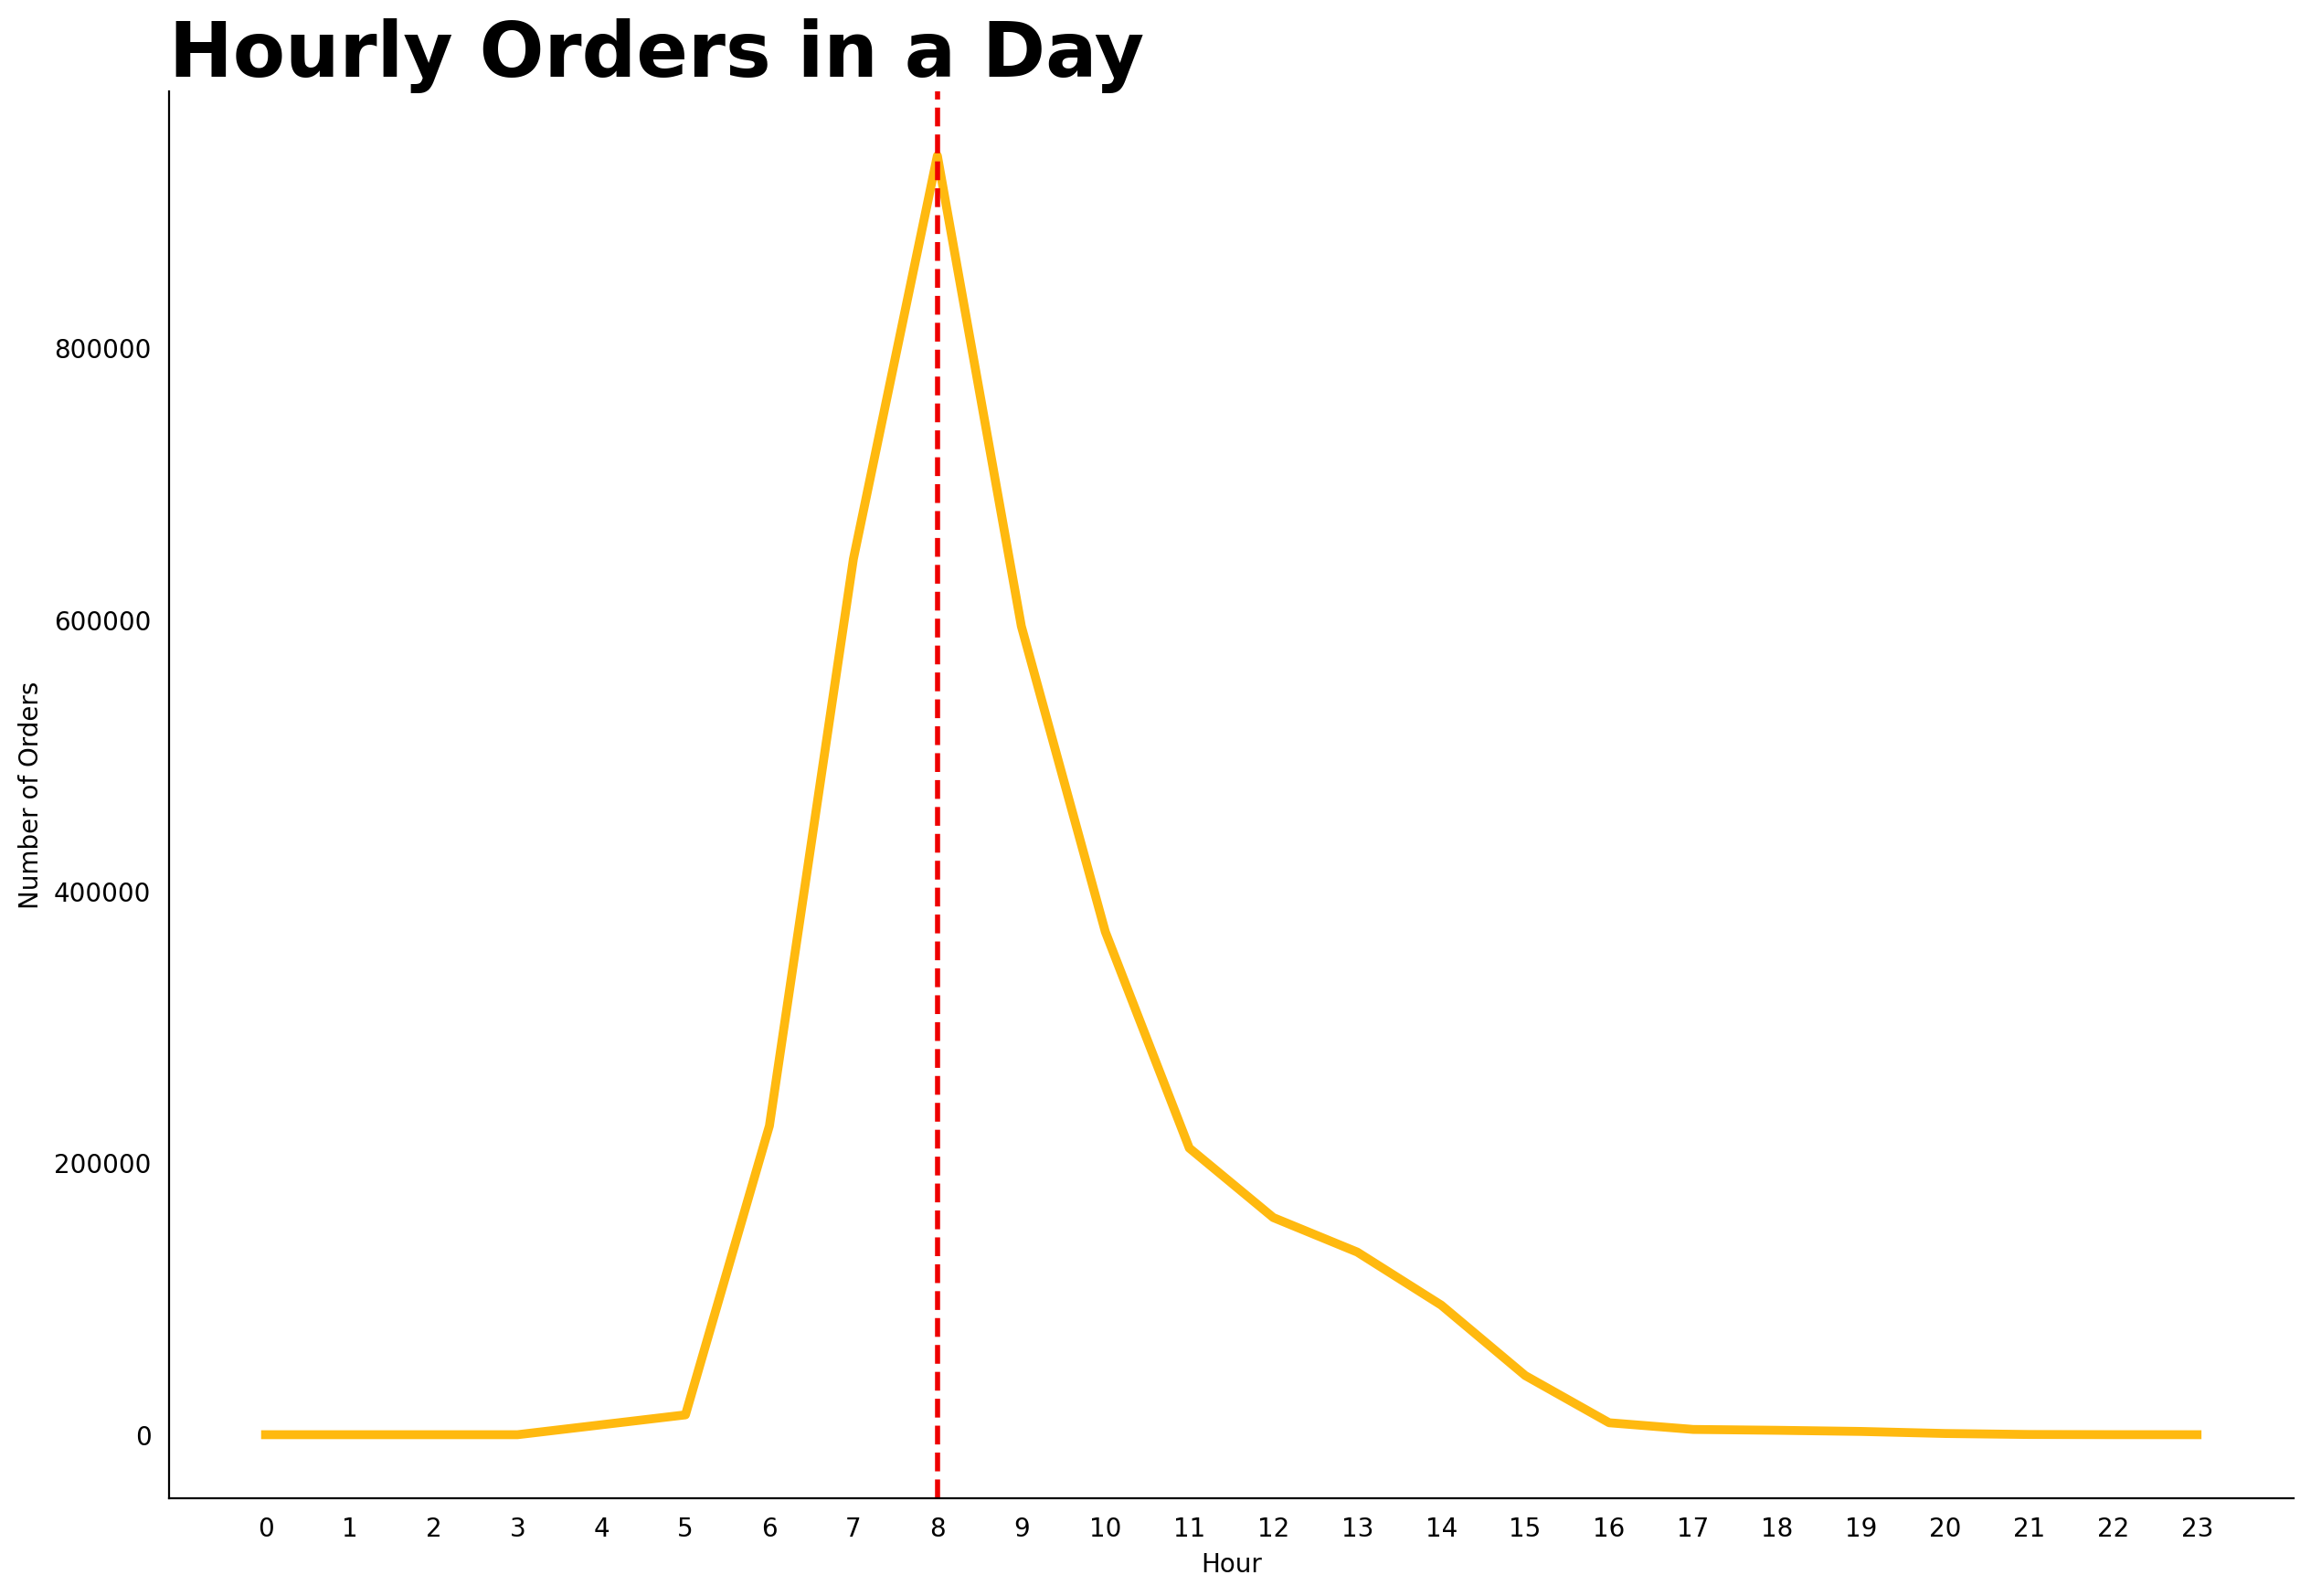

In [15]:
# Plotting the resampled data
fig = plt.figure(figsize=(15, 10), dpi = 200)
ax = plt.gca()

# Set the label for the x and y-axis
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

#Set the title of the plot
plt.title('Hourly Orders in a Day', loc = 'left', size = 30, weight = 'bold')

# Plot the data
plt.plot(trans_per_hour, color='#FFB90F', linewidth=3.5)

#remove spines# Set the x-axis tick locations to be at every hour
for location in ['right', 'top']:
    ax.spines[location].set_visible(False)
    

# Set the x-axis tick locations to be at every hour
plt.xticks(range(24))

#remove ticks
ax.tick_params(left=0, bottom = 0)

# Add a vertical line at 8:00 AM
plt.axvline(x=8, color='#EE0000', linestyle='--', linewidth=2)

# Display the plot
plt.show()


*Our customers are early birds, feasting predominantly from 6AM to 12NN, with the breakfast rush peaking at 8AM.*

### Device Use

In [16]:
# Select the specified columns from the 'transactions' DataFrame and calculate the sum of each column
# Sort the summed values in descending order
device_use = transactions[['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']].sum().sort_values(ascending = False)
device_use

iPhone       1016674.0
Android       188930.0
GCF            60298.0
X11             9858.0
Windows         7702.0
Macintosh       3664.0
Tablet          1970.0
dtype: float64

In [17]:
# Calculate the sum of values in the 'device_use' Series, which represents the total count of device usage
total_count = device_use.sum()

# Divide each value in the 'device_use' Series by the total count and multiply by 100 to calculate the percentages of device usage
device_percentages = (device_use / total_count) * 100
device_percentages

iPhone       78.867206
Android      14.656007
GCF           4.677541
X11           0.764722
Windows       0.597473
Macintosh     0.284230
Tablet        0.152820
dtype: float64

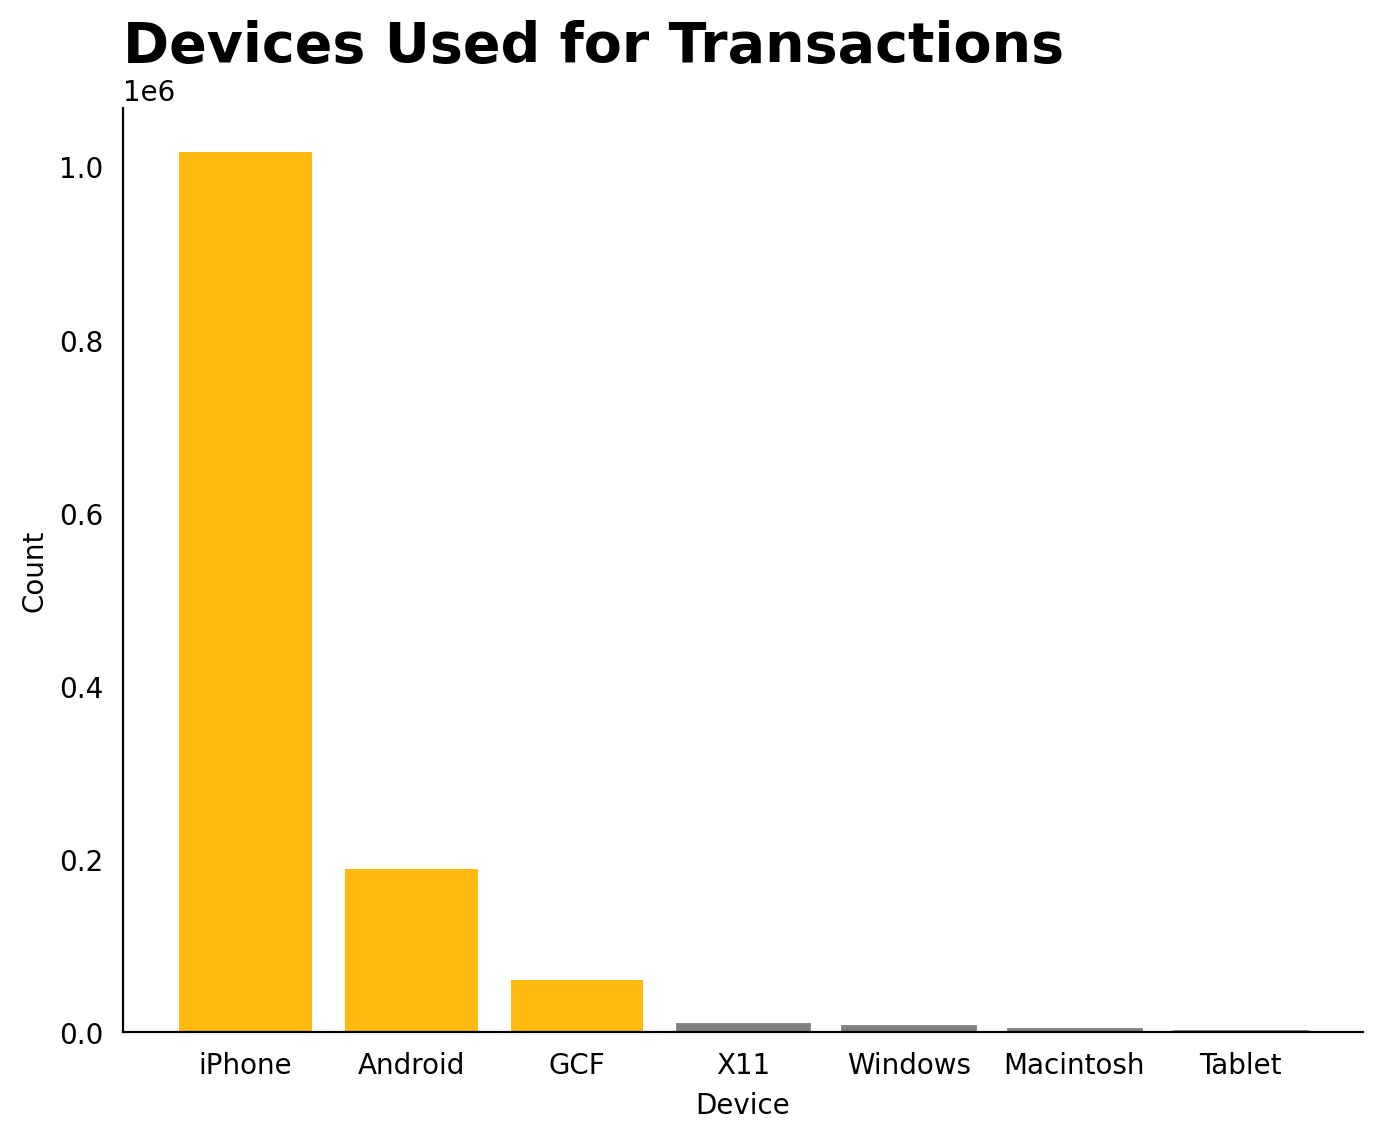

In [18]:
# Summarize device counts and sort in descending order
device_counts = transactions[['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 6), dpi = 200)
bars = plt.bar(device_counts.index, device_counts, color = '#FFB90F')

# Set the color of bars from the 3rd bar onwards to grey
for i in range(3, len(bars)):
    bars[i].set_color('grey')
    
# Customize the chart
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Devices Used for Transactions', weight = 'bold', loc='left', size = 20)

# Remove spines
for location in ['top', 'right']:
    plt.gca().spines[location].set_visible(False)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


# Display the chart
plt.show()

*8 out of 10 of our customers are reaching us through their iPhones.*

### User Spending

The **Formula** is:

$$
\text{Average spent per user} = \frac{{\text{device_category_count}}}{{\text{total_device_count}}} \times \frac{{\text{amount}}}{{\text{total_device_count}}}
$$


In [19]:
# Calculate per-user spending for each device category based on transaction counts and amounts
transactions['Android_per_user_spent'] = (transactions['Android']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['GCF_per_user_spent'] = (transactions['GCF']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['Macintosh_per_user_spent'] = (transactions['Macintosh']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['Tablet_per_user_spentspent'] = (transactions['Tablet']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['Windows_per_user_spent'] = (transactions['Windows']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['X11_per_user_spent'] = (transactions['X11']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))
transactions['iPhone_per_user_spent'] = (transactions['iPhone']/(transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))*(transactions['amount'] / (transactions['Android'] + transactions['GCF'] + transactions['Macintosh'] + transactions['Tablet'] + transactions['Windows'] + transactions['X11'] + transactions['iPhone']))

In [20]:
transactions.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,iPhone,Blacklisted,Not Blacklisted,Android_per_user_spent,GCF_per_user_spent,Macintosh_per_user_spent,Tablet_per_user_spentspent,Windows_per_user_spent,X11_per_user_spent,iPhone_per_user_spent
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,...,22.0,0.0,52.0,1.217708,0.000000,0.000000,0.0,0.000000,0.000000,13.394792
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,...,76.0,0.0,248.0,3.952486,0.988122,0.000000,0.0,0.000000,0.494061,18.774311
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,...,184.0,0.0,584.0,3.136339,0.855365,0.000000,0.0,0.285122,0.285122,26.231200
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,...,232.0,0.0,786.0,4.001220,2.737677,0.000000,0.0,0.000000,0.210591,24.428500
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,...,230.0,0.0,894.0,5.453501,2.608196,0.474217,0.0,0.000000,0.237109,27.267503


In [21]:
# Calculate the mean per user spending for different device categories
per_user_spent_mean = transactions[['iPhone_per_user_spent', 'Android_per_user_spent','GCF_per_user_spent' ]].mean()
per_user_spent_mean

iPhone_per_user_spent     17.545927
Android_per_user_spent     3.412152
GCF_per_user_spent         5.813828
dtype: float64

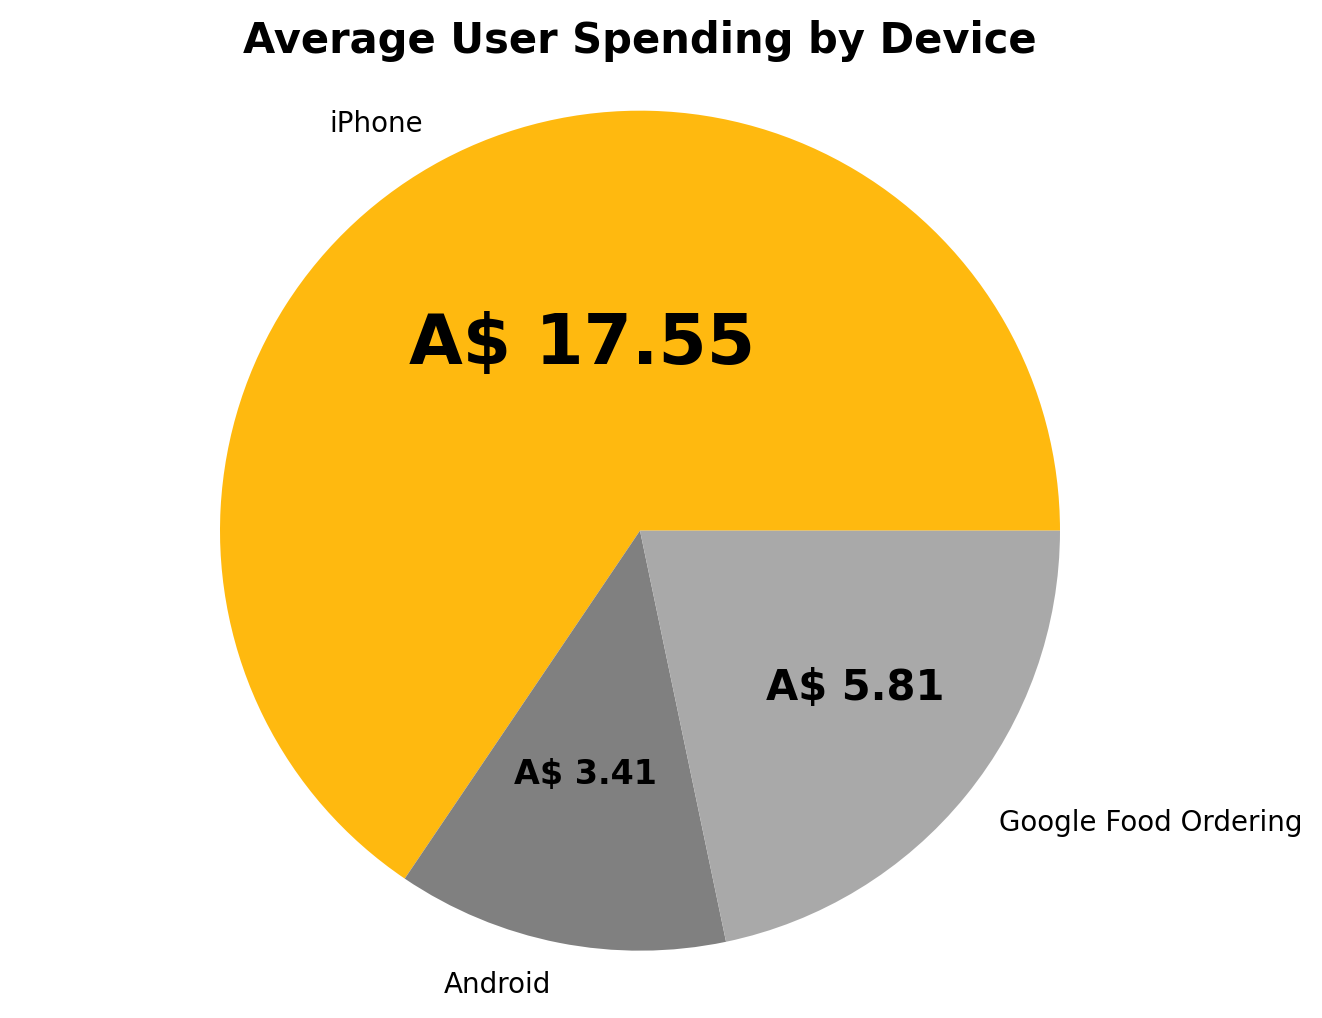

In [22]:
# Calculate the average values
average_values = transactions[['iPhone_per_user_spent', 'Android_per_user_spent', 'GCF_per_user_spent']].mean()

# Create a pie chart
plt.figure(figsize=(8, 6), dpi=200)
plt.pie(average_values, labels=['iPhone', 'Android', 'Google Food Ordering'], colors=['#FFB90F', 'grey', 'darkgrey'])

# Add text annotations to the chart
plt.text(x=-0.55, y=0.4, s='A$ 17.55', weight='bold', size=25)
plt.text(x=0.3, y=-0.4, s='A$ 5.81', weight='bold', size=15)
plt.text(x=-0.3, y=-0.6, s='A$ 3.41', weight='bold', size=12)

# Customize the chart
plt.title('Average User Spending by Device', weight='bold', size=15)
plt.axis('equal')

# Display the chart
plt.show()

*Our iPhone users are not shy about splashing the cash, with an impressive average spend of 17.55 AUD per user.*


# Impact of Promos

In [23]:
transactions.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,iPhone,Blacklisted,Not Blacklisted,Android_per_user_spent,GCF_per_user_spent,Macintosh_per_user_spent,Tablet_per_user_spentspent,Windows_per_user_spent,X11_per_user_spent,iPhone_per_user_spent
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,...,22.0,0.0,52.0,1.217708,0.000000,0.000000,0.0,0.000000,0.000000,13.394792
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,...,76.0,0.0,248.0,3.952486,0.988122,0.000000,0.0,0.000000,0.494061,18.774311
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,...,184.0,0.0,584.0,3.136339,0.855365,0.000000,0.0,0.285122,0.285122,26.231200
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,...,232.0,0.0,786.0,4.001220,2.737677,0.000000,0.0,0.000000,0.210591,24.428500
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,...,230.0,0.0,894.0,5.453501,2.608196,0.474217,0.0,0.000000,0.237109,27.267503


In [26]:
# Filter transactions to select rows without any promotional activity
without_promo = transactions[transactions['promo_count'] == 0.0]
without_promo

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,iPhone,Blacklisted,Not Blacklisted,Android_per_user_spent,GCF_per_user_spent,Macintosh_per_user_spent,Tablet_per_user_spentspent,Windows_per_user_spent,X11_per_user_spent,iPhone_per_user_spent
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,2.0,0.0,0.0,...,22.0,0.0,52.0,1.217708,0.000000,0.0,0.0,0.000000,0.000000,13.394792
9,2021-01-01,15,48.0,38.0,48.0,436.48,0.0,6.0,0.0,0.0,...,10.0,0.0,48.0,10.230000,0.000000,0.0,0.0,0.000000,0.000000,17.050000
11,2021-01-01,17,4.0,4.0,4.0,84.60,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,21.150000
12,2021-01-01,18,18.0,12.0,18.0,964.50,0.0,0.0,10.0,0.0,...,4.0,0.0,18.0,0.000000,37.675781,0.0,0.0,0.000000,7.535156,15.070312
13,2021-01-01,19,14.0,8.0,14.0,885.80,0.0,0.0,6.0,0.0,...,4.0,0.0,14.0,0.000000,36.908333,0.0,0.0,12.302778,0.000000,24.605556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2021-05-31,16,62.0,48.0,62.0,936.60,0.0,8.0,4.0,0.0,...,22.0,0.0,62.0,6.481661,3.240830,0.0,0.0,0.000000,0.000000,17.824567
2480,2021-05-31,17,18.0,16.0,18.0,358.60,0.0,2.0,6.0,0.0,...,8.0,0.0,18.0,2.801563,8.404688,0.0,0.0,0.000000,0.000000,11.206250
2481,2021-05-31,18,10.0,10.0,10.0,380.60,0.0,0.0,2.0,0.0,...,4.0,0.0,10.0,0.000000,11.893750,0.0,0.0,11.893750,0.000000,23.787500
2482,2021-05-31,19,4.0,4.0,4.0,69.00,0.0,0.0,2.0,0.0,...,0.0,0.0,4.0,0.000000,34.500000,0.0,0.0,0.000000,0.000000,0.000000


In [27]:
# Calculate the sum of customers, vendors, orders, and amount for transactions without promo
without_promo[['customers', 'vendors', 'orders', 'amount']].sum()

customers     58684.00
vendors       29760.00
orders        59560.00
amount       773571.18
dtype: float64

In [24]:
# Filter transactions to select rows with any promotional activity
with_promo = transactions[transactions['promo_count'] >= 1.0]
with_promo

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,iPhone,Blacklisted,Not Blacklisted,Android_per_user_spent,GCF_per_user_spent,Macintosh_per_user_spent,Tablet_per_user_spentspent,Windows_per_user_spent,X11_per_user_spent,iPhone_per_user_spent
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,16.0,4.0,0.0,...,76.0,0.0,248.0,3.952486,0.988122,0.000000,0.000000,0.000000,0.494061,18.774311
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,22.0,6.0,0.0,...,184.0,0.0,584.0,3.136339,0.855365,0.000000,0.000000,0.285122,0.285122,26.231200
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,38.0,26.0,0.0,...,232.0,0.0,786.0,4.001220,2.737677,0.000000,0.000000,0.000000,0.210591,24.428500
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,46.0,22.0,4.0,...,230.0,0.0,894.0,5.453501,2.608196,0.474217,0.000000,0.000000,0.237109,27.267503
5,2021-01-01,11,682.0,198.0,702.0,8208.08,6.0,28.0,16.0,0.0,...,232.0,0.0,682.0,2.973788,1.699307,0.000000,0.000000,0.000000,0.212413,24.639959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2474,2021-05-31,11,1540.0,722.0,1568.0,12794.58,38.0,110.0,38.0,2.0,...,536.0,0.0,1540.0,2.855910,0.986587,0.051926,0.103851,0.207703,0.103851,13.916070
2475,2021-05-31,12,1408.0,710.0,1426.0,14105.60,44.0,110.0,50.0,4.0,...,442.0,0.0,1408.0,3.984878,1.811308,0.144905,0.072452,0.362262,0.217357,16.011966
2476,2021-05-31,13,1106.0,568.0,1116.0,8953.14,40.0,56.0,10.0,0.0,...,276.0,0.0,1106.0,4.000892,0.714445,0.000000,0.142889,0.285778,0.428667,19.718684
2477,2021-05-31,14,882.0,428.0,898.0,5264.04,30.0,46.0,10.0,0.0,...,218.0,0.0,882.0,2.919389,0.634650,0.000000,0.126930,0.253860,0.507720,13.835367


In [25]:
# Calculate the sum of customers, vendors, orders, and amount for transactions without promo
with_promo[['customers', 'vendors', 'orders', 'amount']].sum()

customers     3341928.0
vendors        935424.0
orders        3398850.0
amount       25321431.3
dtype: float64

### Business metrics with and without promo

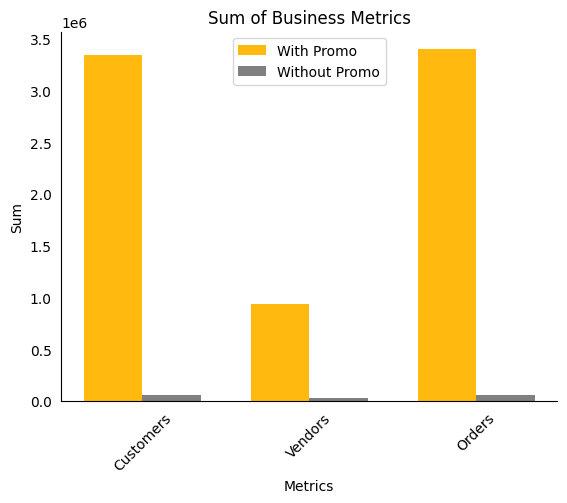

In [31]:
# Calculate the sum of customers, vendors, and orders for promotional and non-promotional data
sum_values_promo = with_promo[['customers', 'vendors', 'orders']].sum()
values_promo = sum_values_promo.tolist()

sum_values_not_promo = without_promo[['customers', 'vendors', 'orders']].sum()
values_not_promo = sum_values_not_promo.tolist()

categories = ['Customers', 'Vendors', 'Orders']
bar_width = 0.35  # Width of each bar

# Calculate the position of the bars
bar_positions_promo = np.arange(len(categories))
bar_positions_not_promo = bar_positions_promo + bar_width

# Create the side-by-side bar chart
plt.bar(bar_positions_promo, values_promo, width=bar_width, label='With Promo', color = "#FFB90F")
plt.bar(bar_positions_not_promo, values_not_promo, width=bar_width, label='Without Promo', color = "grey")

# Add title and label
plt.xlabel('Metrics')
plt.ylabel('Sum')
plt.title('Sum of Business Metrics')
plt.xticks(bar_positions_promo + bar_width / 2, categories, rotation=45)
plt.legend()

# Remove spines
for location in ['top', 'right']:
    plt.gca().spines[location].set_visible(False)

# Remove ticks
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)

plt.show()


In [32]:
# Customer Increase from without promo to with promo
((3341930 - 58770) / 58770)*100

5586.455674663945

In [33]:
# Vendors Increase from without promo to with promo
((935426 - 29834) / 29834)*100

3035.4360796406786

In [34]:
# orders Increase from without promo to with promo
((3398852 - 59648) / 59648)*100

5598.18267167382

In [35]:
# amount Increase from without promo to with promo
((25321439.7 - 775558.78) / 775558.78)*100

3164.9285074175805

*We can observe a clear and significant increase in various business metrics when promotional activities are implemented.*

### Daily Orders with and Without Promo

In [36]:
# Calculate the total number of orders for each date with promo

promo_order_date = with_promo.groupby('trans_date')[['orders']].sum()
promo_order_date

,orders
trans_date,
2021-01-01,4042.0
2021-01-02,9478.0
2021-01-03,9562.0
2021-01-04,13764.0
2021-01-05,14694.0
...,...
2021-05-27,33658.0
2021-05-28,29682.0
2021-05-29,15676.0


In [37]:
# Calculate the total number of orders for each date without promo
no_promo_order_date = without_promo.groupby('trans_date')[['orders']].sum()
no_promo_order_date

,orders
trans_date,
2021-01-01,148.0
2021-01-02,560.0
2021-01-03,102.0
2021-01-04,156.0
2021-01-05,278.0
...,...
2021-05-27,102.0
2021-05-28,176.0
2021-05-29,80.0


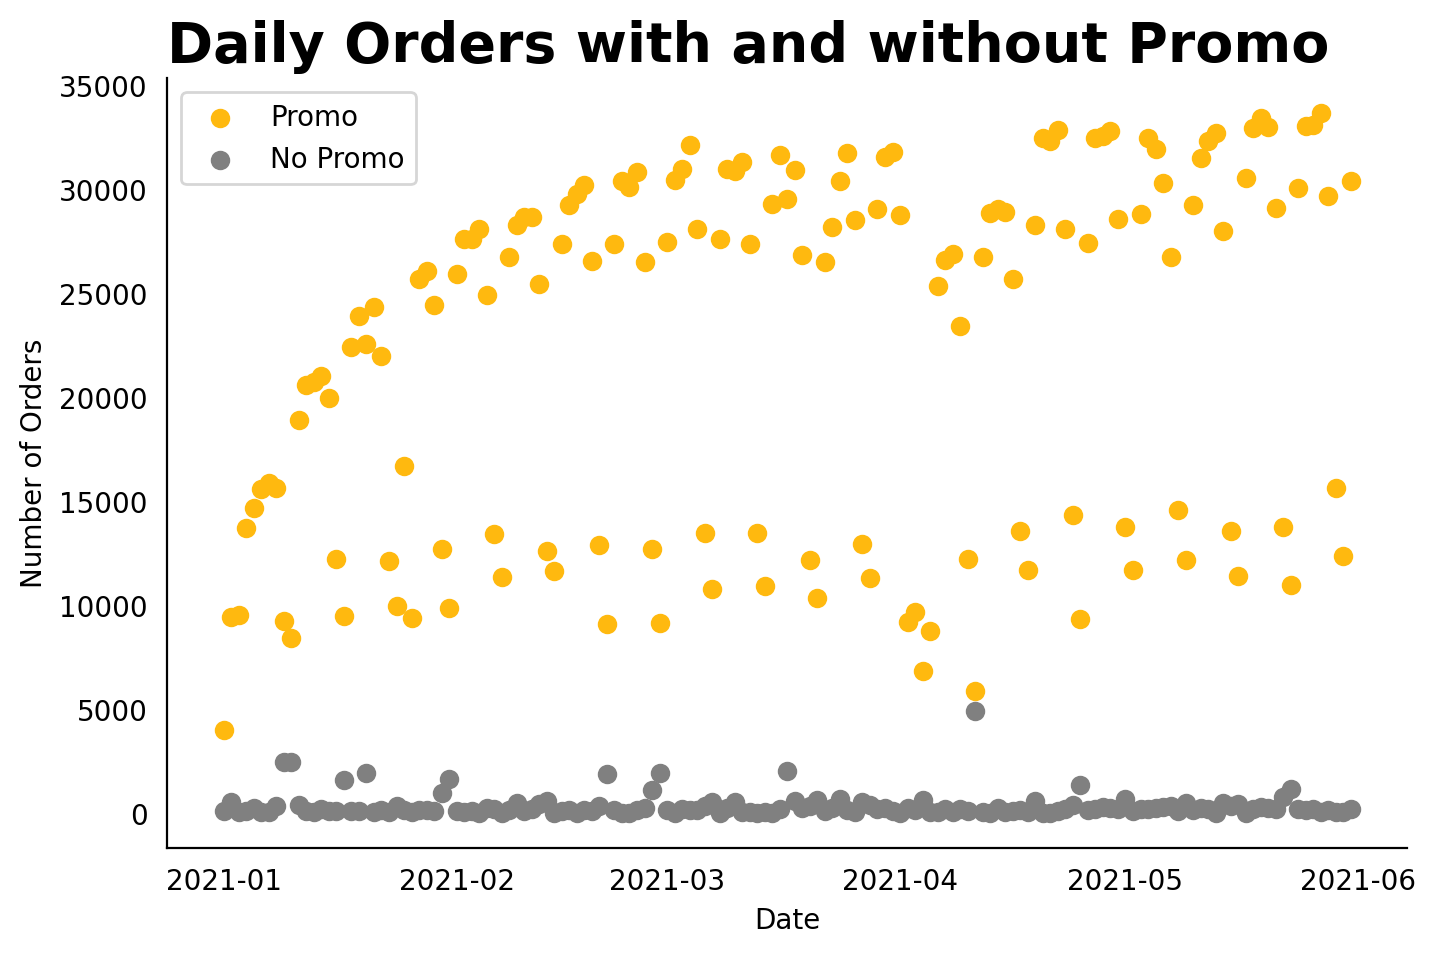

In [44]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=200)

# Convert index values to datetime format
promo_dates = [datetime.strptime(date, '%Y-%m-%d') for date in promo_order_date.index]
no_promo_dates = [datetime.strptime(date, '%Y-%m-%d') for date in no_promo_order_date.index]

# Scatter plot for "Promo" customers
plt.scatter(promo_dates, promo_order_date['orders'], label='Promo', color='#FFB90F')

# Scatter plot for "No Promo" customers
plt.scatter(no_promo_dates, no_promo_order_date['orders'], label='No Promo', color='grey')

# Add title and labels
plt.title('Daily Orders with and without Promo', loc='left', weight='bold', size=20)
plt.xlabel('Date')
plt.ylabel('Number of Orders')

# Remove spines
for location in ['right', 'top']:
    ax.spines[location].set_visible(False)

# Remove ticks
ax.tick_params(left=0, bottom=0)

# Set x-axis to display monthly ticks
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Add a legend
plt.legend()

# Display the plot
plt.show()

*When we compare the numbers, there's a significant difference in orders between those with promos and those without.*

In [45]:
# Calculate the percentage of promo orders out of total orders
(with_promo['promo_count'].sum() / with_promo['orders'].sum())*100

2.1102431704841345

*While promotions drive a surge in order numbers, here's a twist:  of the total orders actually have promos. This means a significant number of orders are still placed without any promotions.* 